
# **ENGG6500 F21**
# **YAOWEN MEI (1177855)** 

# Assignment-2 Question-1

In [2]:
################################################################################
# By default, the sklearn version in colab is too low
# Must install sklearn first, and then clone the latest version
# from github repo: https://github.com/scikit-learn/scikit-learn.git
# install the latest version and restart colab notbook
################################################################################
!pip uninstall scikit-learn -y
!pip uninstall sklearn -y
!pip install git+https://github.com/scikit-learn/scikit-learn.git

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
Found existing installation: sklearn 0.0
Uninstalling sklearn-0.0:
  Successfully uninstalled sklearn-0.0
  Cloning https://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-njt5kp83
  Running command git clone -q https://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-njt5kp83
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.1.dev0-cp37-cp37m-linux_x86_64.whl size=18467950 sha256=c637b80e072b6e995de2ccb1e2afb546e92eafb459b0ad6697623f3793e98b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ad6y_pk2/wheels/1a/0f/26/74c5e1b0906ce06cbbf8153711a059cd621669a32cea539f43
Successfully built scikit-learn


In [1]:
# make sure sklearn veriosn is 1.0.*
import sklearn
print(sklearn.__version__) # the return must be "1.1.dev0" or higher

1.1.dev0


In [2]:
################################################################################
# Prepare all the librarys and pre-processing the raw data
###############################################################################
# basic librarys
import operator
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as rq
import pandas as pd
from io import BytesIO
import copy


# librarys for plots
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# import skr-machine learning library to pre-processing the data
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

In [3]:
################################################################################
# Download all the raw data files from github to colab
###############################################################################
TRAIN_DATA_URL = 'https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-2/train_data.npy?raw=true'
TRAIN_LABEL_URL = 'https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-2/train__labels.npy?raw=true'
TEST_DATA_URL = 'https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-2/test_data.npy?raw=true'
TEST_LABEL_URL = 'https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-2/test_labels.npy?raw=true'

import urllib.request
urllib.request.urlretrieve(TRAIN_DATA_URL,"train_data.npy")
urllib.request.urlretrieve(TRAIN_LABEL_URL,"train__labels.npy")
urllib.request.urlretrieve(TEST_DATA_URL,"test_data.npy")
urllib.request.urlretrieve(TEST_LABEL_URL,"test_labels.npy")


('test_labels.npy', <http.client.HTTPMessage at 0x7f8f94251810>)

In [4]:
################################################################################
# Load all the data from file to numpy array, and clean the data
###############################################################################
train_data = np.load("train_data.npy")
train_label = np.load("train__labels.npy")
test_data = np.load("test_data.npy")
test_label = np.load("test_labels.npy")

# renormalize the train/test data into 0-1 scale:
train_data = train_data/255
test_data = test_data/255

# initial a random weight matrix, by default the random num is [0,1],
# then, subtract 0.5 to make it in the range of [-0.5, 0.5], then devide by 10
# the weight matrix should have dimension (10, 784) 
# the bias matrix should have dimension (10,)
initial_weight_array = (np.random.rand(10,784)-0.5)/10 # dim is (10,784)
initial_intercept_array = (np.random.rand(10,)-0.5)/10 # dim is (10,)

In [19]:
# Check the dimension of thach dataset
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(7500, 784)
(7500,)
(1000, 784)
(1000,)


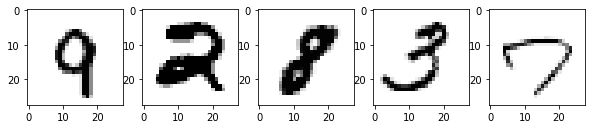

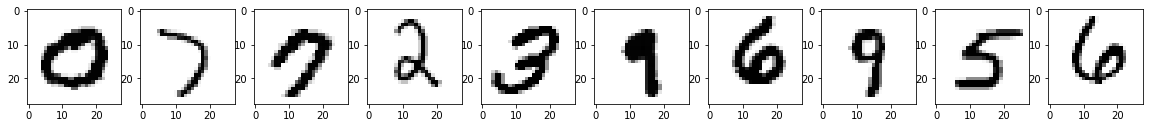

In [7]:
# This pImg method will take a arrage of images, and print out them as a fig object
def pImg(pics):
  num_of_columns = len(pics)
  fig, axes = plt.subplots(nrows=1, ncols=num_of_columns, figsize=(2*num_of_columns,2))
  for i in range(num_of_columns):
    train_data_sample_reshaped = np.reshape(pics[i], (28, 28))
    axes[i].imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
  return

pics = train_data[0:5]
pImg(pics)
pics = train_data[10:20]
pImg(pics)

In [19]:
# This method make a plot based on 2 inputs, learn rate, and a list of [epoch_list, train_accuracy_list, test_accuracy_list]
def make_accuracy_plot(resultList, learn_rate = 1):
  ep, traina, testa = resultList
  plt.figure(1)
  l1,=plt.plot(ep,traina,marker = 'o', color='green', label='Train_Accuracy')
  l2,=plt.plot(ep,testa, marker = "v", color='red', linewidth=1.0, label='Test_Accuracy')
  plt.xlabel('epoch #', fontsize=22)
  plt.ylabel('Accuracy', fontsize=22)

  plt.xticks(fontsize=22); plt.yticks(fontsize=22)
  plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
  plt.title("Accuracy vs Epoch value @ Learning Rate="+str(learn_rate), fontsize=22)
  plt.legend(fontsize=10)
  plt.rcParams["figure.figsize"] = (20,5) # change the size of the picture
  # plt.show()

In [49]:
# This method make a plot based on 2 inputs, learn rate, and a list of [epoch_list, train_accuracy_list, test_accuracy_list]
def make_accuracy_plot_onFig(resultList, learn_rate = 1):
  ep, traina, testa = resultList
  myfig = plt.figure(1)
  myax=myfig.add_axes([0,0,1,1])

  l1,=myax.plot(ep,traina,marker = 'o', color='green', label='Train_Accuracy')
  l2,=myax.plot(ep,testa, marker = "v", color='red', linewidth=1.0, label='Test_Accuracy')
  myax.set_xlabel('epoch #', fontsize=22)
  myax.set_ylabel('Accuracy', fontsize=22)

  # plt.xticks(fontsize=22); plt.yticks(fontsize=22)
  # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 2 decimal places
  myax.set_title("Accuracy vs Epoch value @ Learning Rate="+str(learn_rate), fontsize=22)
  myax.legend(fontsize=18)
  myfig.set_size_inches(10,5) # change the size of the picture
  myfig.show()

In [131]:
# This method will train a preceptron array, and return a list of accuracy
# The input variable is learn_rate: the learning rate of the training
#              max_epoch number: the max num of epoch
# and return is a list of [[epoch_num],[training_accuracy],[testing_accuracy]]
def perceptron_accuracy_list_vs_epoch(learn_rate,max_epoch=50,):

  # sub_press any warning message
  import warnings
  warnings.filterwarnings("ignore")

  # initialize a result list
  epoch_list = []
  train_accuracy_list = []
  test_accuracy_list = []
  X = train_data
  y = train_label

  # make a deepcopy of the connecting weight matrix
  weights = copy.deepcopy(initial_weight_array)
  bias = copy.deepcopy(initial_intercept_array)


  dummy_weight = copy.deepcopy(initial_weight_array)
  dummy_bias = copy.deepcopy(initial_intercept_array)

  # Do a clean initializeation for the 1st iteration:
  # myPerceptrons = Perceptron(max_iter=1, shuffle=False, random_state=None, eta0= learn_rate, warm_start=False)
  myPerceptrons = Perceptron(eta0= learn_rate, max_iter=1, shuffle=True)

  # for epoch zero:
  # append result to the result list
  # epoch_list.append(0)
  # myPerceptrons.fit(X,y,coef_init= dummy_weight,intercept_init= dummy_bias) # dummy train
  # myPerceptrons.coef_ = copy.deepcopy(initial_weight_array) # set back the model
  # myPerceptrons.intercept_: copy.deepcopy(initial_intercept_array)
  # train_accuracy_list.append(myPerceptrons.score(train_data,train_label))
  # test_accuracy_list.append(myPerceptrons.score(test_data,test_label))


  # Do a partial train for each epoch
  for e in range(1,max_epoch+1,1):
    myPerceptrons.fit(X,y,coef_init= weights,intercept_init= bias)

    # append result to the result list
    epoch_list.append(e-1)
    train_accuracy_list.append(myPerceptrons.score(train_data,train_label))
    test_accuracy_list.append(myPerceptrons.score(test_data,test_label))
  
  # after training, plot the confusion matrix
  disp = ConfusionMatrixDisplay.from_estimator(
        myPerceptrons,
        test_data,
        test_label,)
  f = plt.figure(2)
  a=f.add_axes([0,0,1,1])
  f.set_size_inches(10,10) # change the size of the picture
  plt.rcParams['font.size'] = '18'
  disp.plot(ax=a, cmap=plt.cm.Greens)
  a.set_xlabel('Predict Labels', fontsize=22)
  a.set_ylabel('True Labels', fontsize=22)
  a.set_title("Learning Rate @{}".format(learn_rate))

  # print(disp.confusion_matrix)
  make_accuracy_plot_onFig([epoch_list, train_accuracy_list, test_accuracy_list], learn_rate=learn_rate)
  return [epoch_list, train_accuracy_list, test_accuracy_list]

At Epoch 49 the Train Accuracy is 0.930 and the Test Accuracy is 0.867


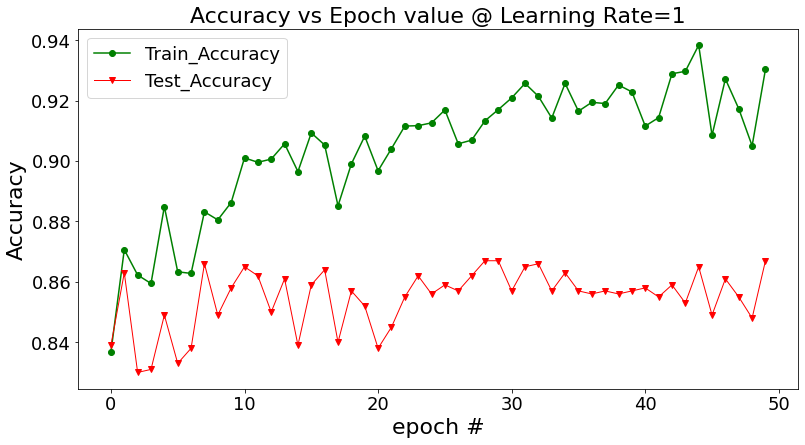

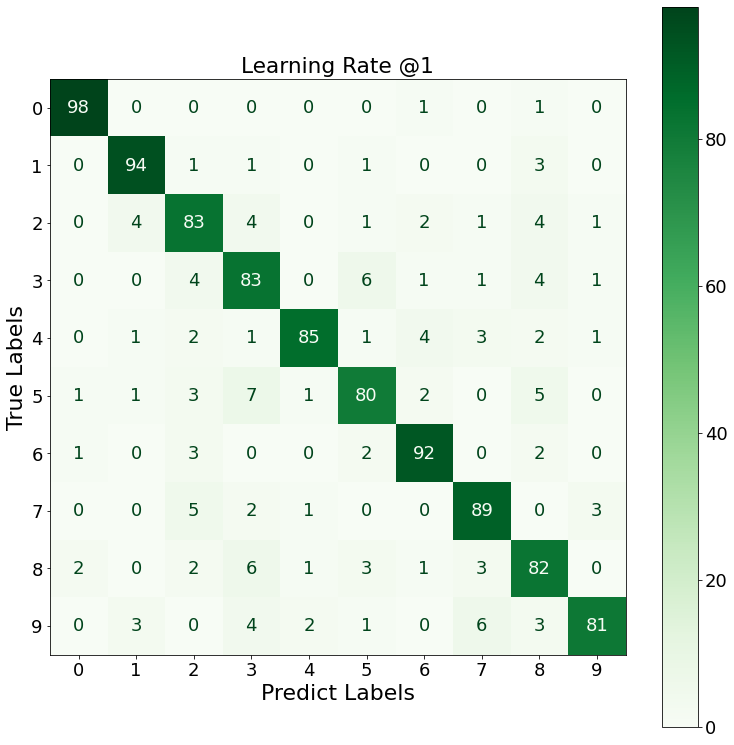

In [132]:
# set the learning rate to be 1
learn_rate = 1
resultList = perceptron_accuracy_list_vs_epoch(learn_rate, max_epoch=50)
print("At Epoch {0} the Train Accuracy is {1:.3f} and the Test Accuracy is {2:.3f}".format(resultList[0][-1], resultList[1][-1], resultList[2][-1]))

At Epoch 49 the Train Accuracy is 0.935 and the Test Accuracy is 0.866


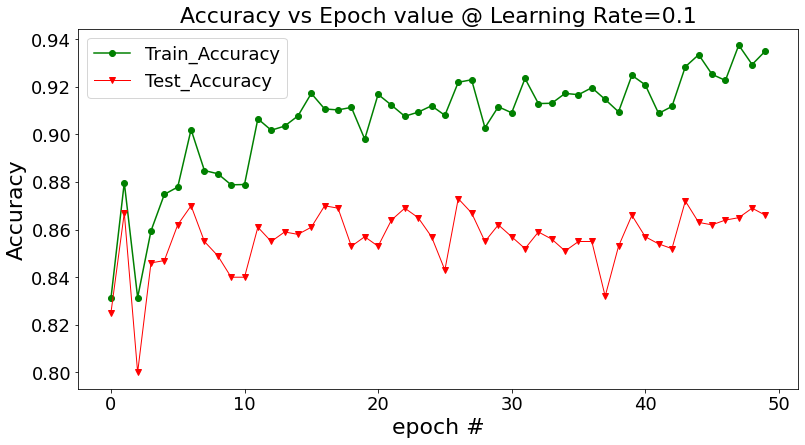

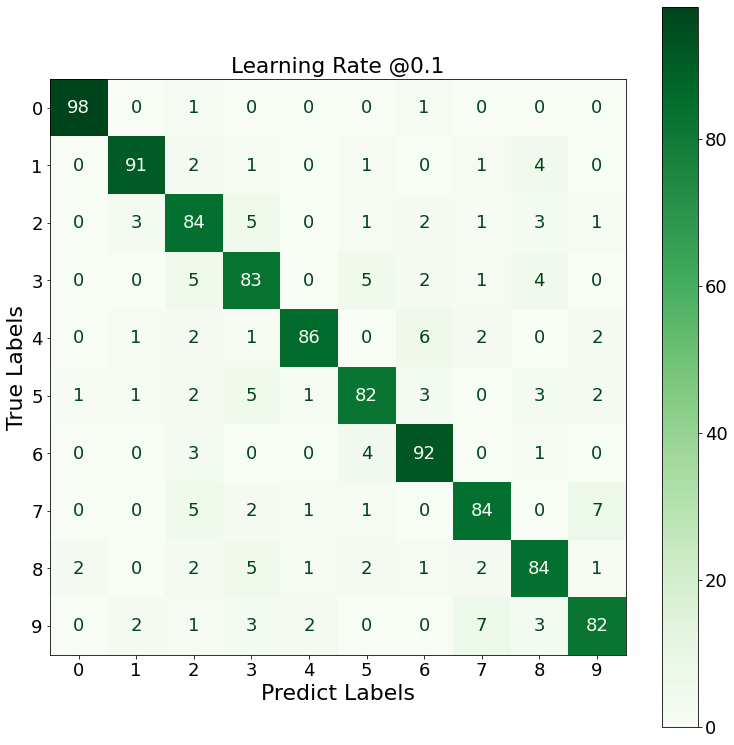

In [133]:
# set the learning rate to be 0.1
learn_rate = 0.1
resultList = perceptron_accuracy_list_vs_epoch(learn_rate,max_epoch=50)
print("At Epoch {0} the Train Accuracy is {1:.3f} and the Test Accuracy is {2:.3f}".format(resultList[0][-1], resultList[1][-1], resultList[2][-1]))

At Epoch 49 the Train Accuracy is 0.930 and the Test Accuracy is 0.863


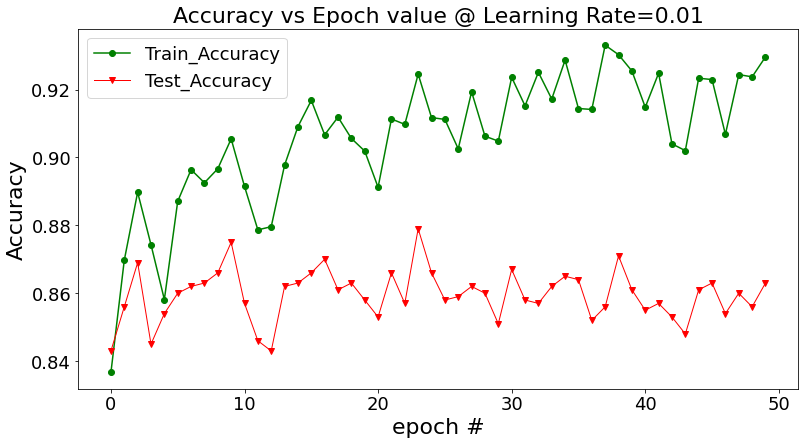

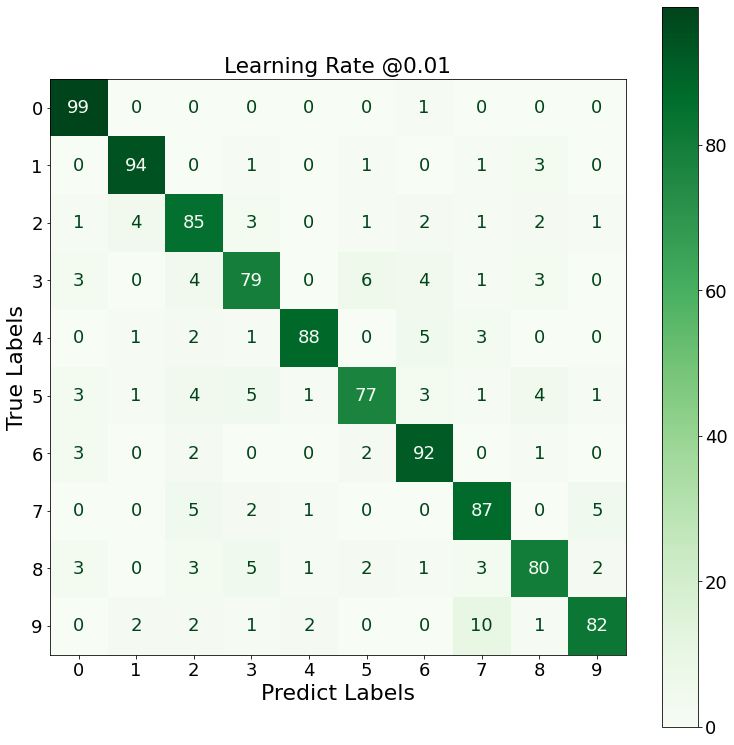

In [135]:
# set the learning rate to be 0.01
learn_rate = 0.01
resultList = perceptron_accuracy_list_vs_epoch(learn_rate, max_epoch=50)
print("At Epoch {0} the Train Accuracy is {1:.3f} and the Test Accuracy is {2:.3f}".format(resultList[0][-1], resultList[1][-1], resultList[2][-1]))

At Epoch 49 the Train Accuracy is 0.905 and the Test Accuracy is 0.859


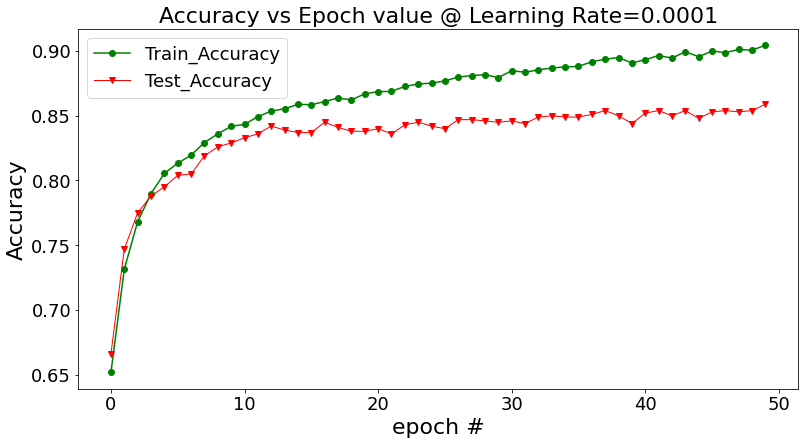

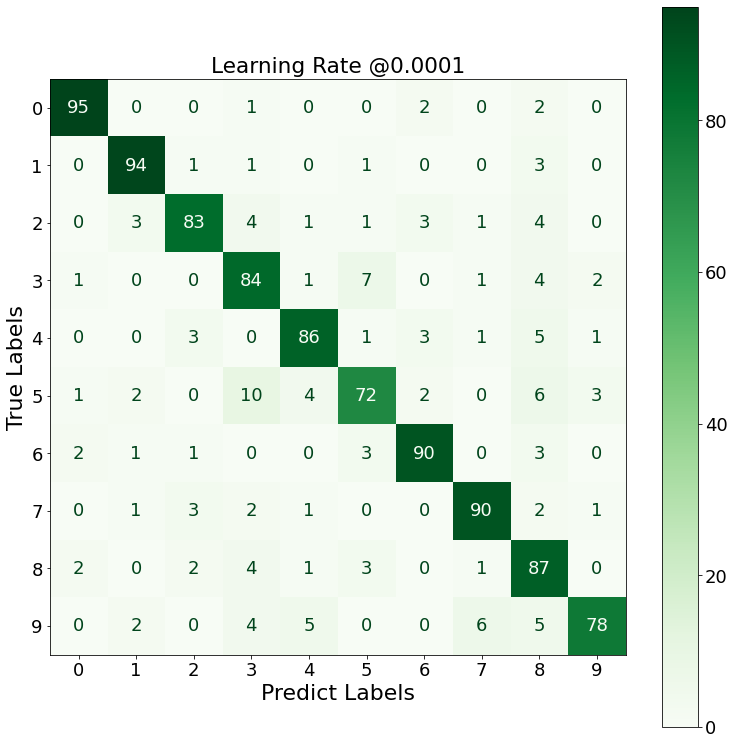

In [136]:
# set the learning rate to be 0.01
learn_rate = 0.0001
resultList = perceptron_accuracy_list_vs_epoch(learn_rate, max_epoch=50)
print("At Epoch {0} the Train Accuracy is {1:.3f} and the Test Accuracy is {2:.3f}".format(resultList[0][-1], resultList[1][-1], resultList[2][-1]))

At Epoch 499 the Train Accuracy is 0.955 and the Test Accuracy is 0.853


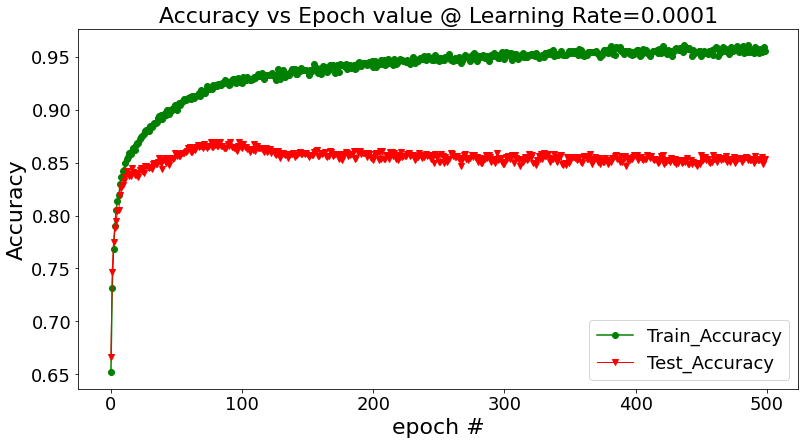

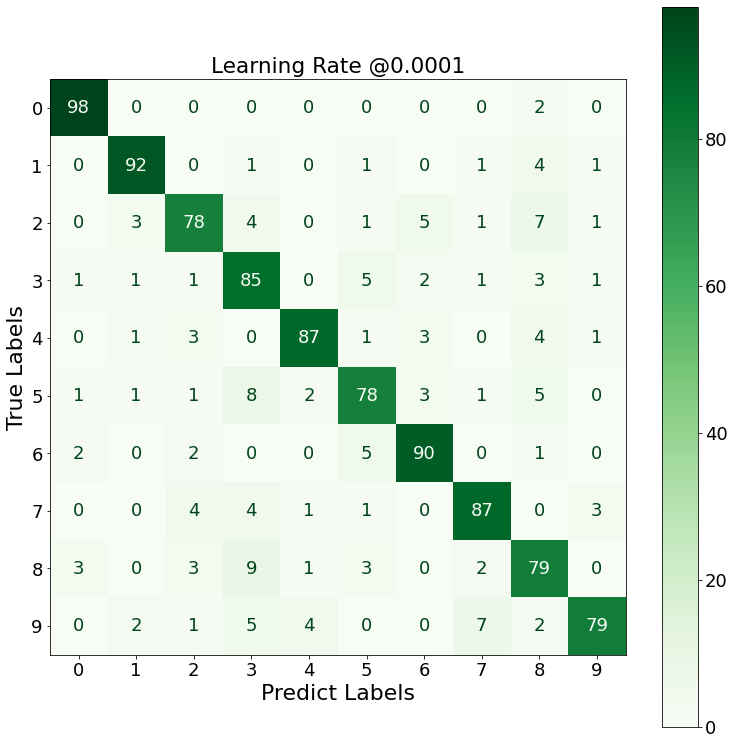

In [138]:
# set the learning rate to be 0.0001
learn_rate = 0.0001
resultList = perceptron_accuracy_list_vs_epoch(learn_rate, max_epoch=500)
print("At Epoch {0} the Train Accuracy is {1:.3f} and the Test Accuracy is {2:.3f}".format(resultList[0][-1], resultList[1][-1], resultList[2][-1]))

# **Assignment-2 Question-2**

In [14]:
################################################################################
# Prepare all the librarys and pre-processing the raw data
###############################################################################
# basic librarys
import operator
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as rq
import pandas as pd
from io import BytesIO
import copy


# librarys for plots
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import r_regression
# Reference https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# import the excel filr from github
# https://stackoverflow.com/questions/66648775/how-to-get-link-of-xlsx-file-in-github-to-be-opened-as-a-pandas-dataframe
url = "https://github.com/y5mei/ENGG6500Fall21_Machine_Learning/blob/main/Assignment-2/Parking_lots_dataset.csv?raw=true"
data = rq.get(url).content
df = pd.read_csv(BytesIO(data))
df.columns = ['Park', 'Cap','Num']

In [7]:
# set the Cap and Num col to be numeric numbers
# add the percentage of occupancy into the df dataframe
df["Cap"] = pd.to_numeric(df["Cap"])
df["Num"] = pd.to_numeric(df["Num"])
df['Percentage'] = df['Num']/df['Cap']
df = df.drop(labels=["Num","Cap"], axis=1)
print(df)

def dataframe_prepare(grouped_df):
  grouped_df = grouped_df.reset_index()
  grouped_df = grouped_df.drop(labels="index",axis=1)
  grouped_df = grouped_df.reset_index()
  # print(grouped_df)
  return grouped_df

                Park  Percentage
0     Parking lot 01    0.105719
1     Parking lot 01    0.110919
2     Parking lot 01    0.138648
3     Parking lot 01    0.185442
4     Parking lot 01    0.259965
...              ...         ...
6501  Parking lot 05    0.790104
6502  Parking lot 05    0.774479
6503  Parking lot 05    0.745833
6504  Parking lot 05    0.688021
6505  Parking lot 05    0.614583

[6506 rows x 2 columns]


In [8]:
# subgroup the data by Parking Lot Name
gp = df.groupby('Park')
# Only keep the percentage of fill in the dataframe
df1 = dataframe_prepare(gp.get_group('Parking lot 01'))
df2 = dataframe_prepare(gp.get_group('Parking lot 02'))
df3 = dataframe_prepare(gp.get_group('Parking lot 03'))
df4 = dataframe_prepare(gp.get_group('Parking lot 04'))
df5 = dataframe_prepare(gp.get_group('Parking lot 05'))

In [9]:
print(df1[['index',"Percentage"]])

      index  Percentage
0         0    0.105719
1         1    0.110919
2         2    0.138648
3         3    0.185442
4         4    0.259965
...     ...         ...
1307   1307    0.535529
1308   1308    0.519931
1309   1309    0.474870
1310   1310    0.398614
1311   1311    0.334489

[1312 rows x 2 columns]


In [36]:
def linear_predict_with_df(df, parking_lot_name:str):
  # sub_press any warning message
  import warnings
  warnings.filterwarnings("ignore")

  # Create linear regression object
  regr = linear_model.LinearRegression()
  X = df["index"][:,np.newaxis]
  y = df["Percentage"][:,np.newaxis]
  regr.fit(X,y) # train the model

  # Make predictions using the same dataset:
  pred = regr.predict(X)

  # Let's make a plot
  myfig = plt.figure(parking_lot_name)
  myfig.set_size_inches(5,5) # change the size of the picture
  myax=myfig.add_axes([0,0,1,1]) # make the ax to be fullsize
  # myax.legend(fontsize=18)
  myax.set_title("Regression Line for "+ str(parking_lot_name), fontsize=22)
  myax.set_xlabel('# of Days', fontsize=22)
  myax.set_ylabel('Occupancy Rate (%)', fontsize=22)
  
  # Put a text in the plot
  myax.text(0,1.10,"Linear Reg: y = {0:.2e}X+{1:.2f}".format(regr.coef_[0][0], regr.intercept_[0]), bbox=dict(facecolor='blue', alpha=0.3),fontsize=20)
  # Plot the points and the trend line
  myax.scatter(X,y,color="black", alpha=0.2)
  myax.plot(X, pred, color="blue", linewidth=5)
  myax.set_ylim([0, 1.2])
  myfig.show()

  # get the last x
  last_x = X[-1][0]
  last_result = regr.predict(X)[-1][0]
  print("The slope is {0:.8f}, and the intercept is {1:.2f}".format(regr.coef_[0][0], regr.intercept_[0]))
  print("The predicted precentage occupancy at day {0} is {1:.2f}".format(last_x, last_result))
  # The coefficient of determination: 1 is perfect prediction
  r2 = sklearn.feature_selection.r_regression(X,y,center=True)
  print("Pearson correlation coefficient (R): {0:.5f}".format(r2[0]))

The slope is -0.00000370, and the intercept is 0.28
The predicted precentage occupancy at day 1311 is 0.28
Pearson correlation coefficient (R): -0.00814


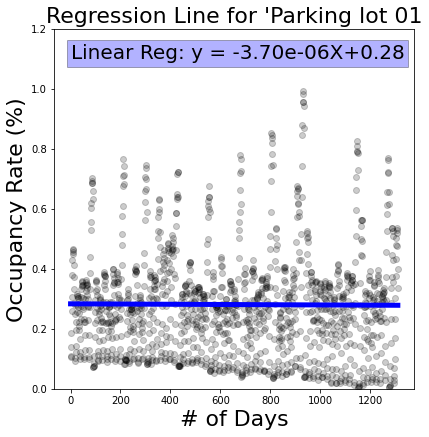

In [37]:
linear_predict_with_df(df1, "'Parking lot 01")

The slope is -0.00002450, and the intercept is 0.44
The predicted precentage occupancy at day 1275 is 0.41
Pearson correlation coefficient (R): -0.04628


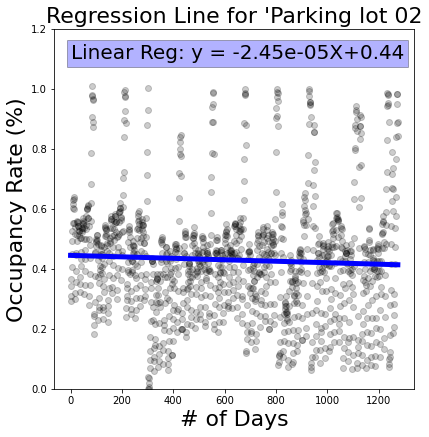

In [38]:
linear_predict_with_df(df2, "'Parking lot 02")

The slope is 0.00024704, and the intercept is 0.50
The predicted precentage occupancy at day 1293 is 0.82
Pearson correlation coefficient (R): 0.38577


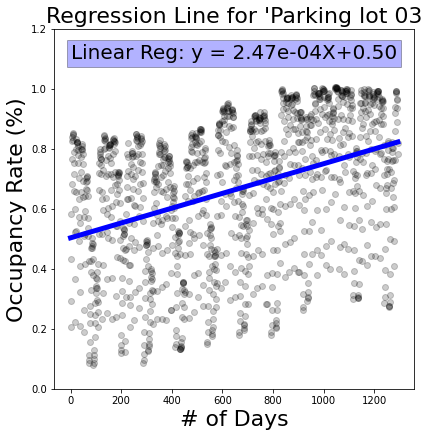

In [39]:
linear_predict_with_df(df3, "'Parking lot 03")

The slope is 0.00022616, and the intercept is 0.60
The predicted precentage occupancy at day 1311 is 0.89
Pearson correlation coefficient (R): 0.35912


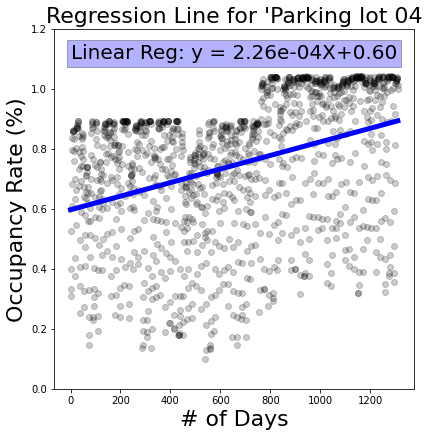

In [40]:
linear_predict_with_df(df4, "'Parking lot 04")

The slope is 0.00008943, and the intercept is 0.50
The predicted precentage occupancy at day 1311 is 0.61
Pearson correlation coefficient (R): 0.17464


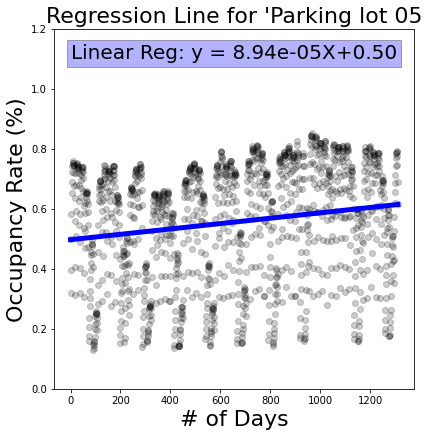

In [41]:
linear_predict_with_df(df5, "'Parking lot 05")

# **Assignment3 MINIST K-MEAN**

Reference: https://medium.datadriveninvestor.com/k-means-clustering-for-imagery-analysis-56c9976f16b6

API Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [182]:
# load the MINIST DATASET and make sure it has 60000 pictures inside
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [183]:
# Make sure the dataset dimension matches the assignment requriements
# 60000 for training
print(x_train.shape) # this are the 60000 training images (60000, 28, 28)
print(y_train.shape) # this is the training labels (60000,)

(60000, 28, 28)
(60000,)


In [184]:
# Wash the raw data to make it the same as assignment-1, the train_data should be (60000,784), row major
# and normalize the all the image vectos to 0 and 1

X = x_train.reshape(60000, -1)
X = X/255
y = y_train
print(X.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [185]:
# train a model with 10 clusters
from sklearn.cluster import KMeans
K = 10

kmeans = KMeans(n_clusters=K, init = 'random', random_state  = 500, tol = 0.001, max_iter=100)  # chose K data points randomly from the input data for the initial centroids

In [191]:
# this is the funciton requried by the assignemnt, 
# it takes two requried input, X, a nd-array of size N, for the training images, and K, the number of clusters
# it also takes a optional argument input, P, the max limit for epoch number
# it has 3 returns in a list
# the 1st return is a list of N labels represent each of the training images belongs to which clusters
# the 2nd return is a dictionary, key is the label of each cluster name, value is a list of images
# the 3rd return is a series of SSE (J^Cluster) for each epoch number
def k_mean_minst_clustering(X, K, P=30):
  real_ep_max = P

  # sub_press any warning message
  import warnings
  warnings.filterwarnings("ignore")

  label_list_fro_each_images = []
  list_of_list_of_clusters = [[] for _ in range(K)]
  Jcluster = []

  # randomly initialized K cluster centerts by choose K points from input dataset
  initial_centers = X[np.random.choice(len(X), size=K, replace=False)]
  initial_centers = copy.deepcopy(initial_centers) # make a deepcopy
  
  # train it over P times:
  for _ in range(1, real_ep_max+1, 1):
    # set the center position and train the model
    kmeans = KMeans(n_clusters=K, init = initial_centers, random_state  = 500, tol = 0.001, max_iter=1)  # chose K data points randomly from the input data for the initial centroids
    mykmean = kmeans.fit(X)
    initial_centers = copy.deepcopy(kmeans.cluster_centers_)

    # print(mykmean.inertia_)
    centers = mykmean.cluster_centers_
    # upodate the J_cluseter
    SSE = mykmean.inertia_
    Jcluster.append(SSE)

    # if this is the last epoch
    if _ == P:
      for i in range(len(X)):
        image = X[i:i+1] # this is the target image in a 1D array
        predicted_cluster_label = mykmean.predict(image)[0] # get the int for the predictred cluster label
        cluster_center = centers[predicted_cluster_label] # get the coordinate for the cluster center
        # update the result
        label_list_fro_each_images.append(predicted_cluster_label)
        list_of_list_of_clusters[predicted_cluster_label].append(image[0])
      

    
  
  # after training, return a deepcopy of the required results
  a1 = copy.deepcopy(label_list_fro_each_images)
  a2 = copy.deepcopy(list_of_list_of_clusters)
  a3 = copy.deepcopy(Jcluster)

  # finally, let's make a plot:
  ep = [_ for _ in range(real_ep_max)]
  myfig = plt.figure()
  myax=myfig.add_axes([0,0,1,1])
  myfig.set_size_inches(10,5) # change the size of the picture
  myax.set_xlabel('epoch #', fontsize=22)
  myax.set_ylabel(r'$J^{Cluster}$ (SSE)', fontsize=22)
  myax.set_title(r"$J^{Cluster}$ vs Epoch value @ K ="+str(K), fontsize=22)

  l1,=myax.plot(ep, a3, marker = 'o', color='green', label='J_Cluster')

  return [a1, a2, a3, mykmean]



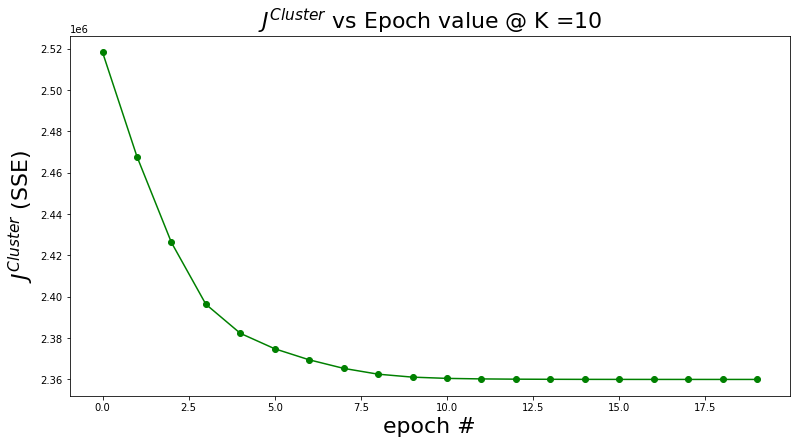

In [330]:
lbs, dict_of_clusters, JvE, myKmeanModel = k_mean_minst_clustering(X,K=10,P=20)

In [351]:
# report the last J_Cluster Value
print(JvE[-1])

2359942.7863746765


**Now, need to calculate the top 10 nearest images to each center**

In [ ]:
# Now, need to calculate the top 10 nearest images to each center
near_ten_elements = []
mycenterpoints = myKmeanModel.cluster_centers_

def cal_dist(a,b):
  dist = 0
  for i in range(len(a)):
    dist += (a[i]-b[i])*(a[i]-b[i])
  return dist

mylist = []
for i in range(len(dict_of_clusters)):
  image_need_to_be_sort = copy.deepcopy(dict_of_clusters[i])
  dummy_result = []
  dummy_sort = []
  for j in image_need_to_be_sort:
    dummy_sort.append([cal_dist(j, mycenterpoints[i]), j])
  dummy_sort.sort()
  for k in range(10):
    d, ig = dummy_sort[k]
    dummy_result.append(ig)
  
  mylist.append(copy.deepcopy(dummy_result))

Need to make a function to visulaize the K groups, plan to plot 9 random images out of each clustsers, and make them together as one image.

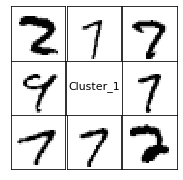

In [298]:

# This pImg method will take a arrage of images, and print out them as a fig object
def pImg_subImg_for_3b(current_list, cluster_name):
  pics = current_list[0:9]
  num_of_columns = 3
  cnt = 0
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(3,3))
  fig.subplots_adjust(wspace=0, hspace=0)
  for ax in axes.flat:
    train_data_sample_reshaped = np.reshape(pics[cnt], (28, 28))
    ax.set_xticks([])
    ax.set_yticks([])
    if cnt ==4:
      text = "Cluster_{}".format(cluster_name)
      ax.annotate(text, (0.05, 0.5),fontsize = 11)
    else:
      ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
    cnt+=1
  return axes

pics = dict_of_clusters[0][0:9]
b = pImg_subImg_for_3b(pics,1)

**Now, need to calculate the top 9 nearest images to each center**

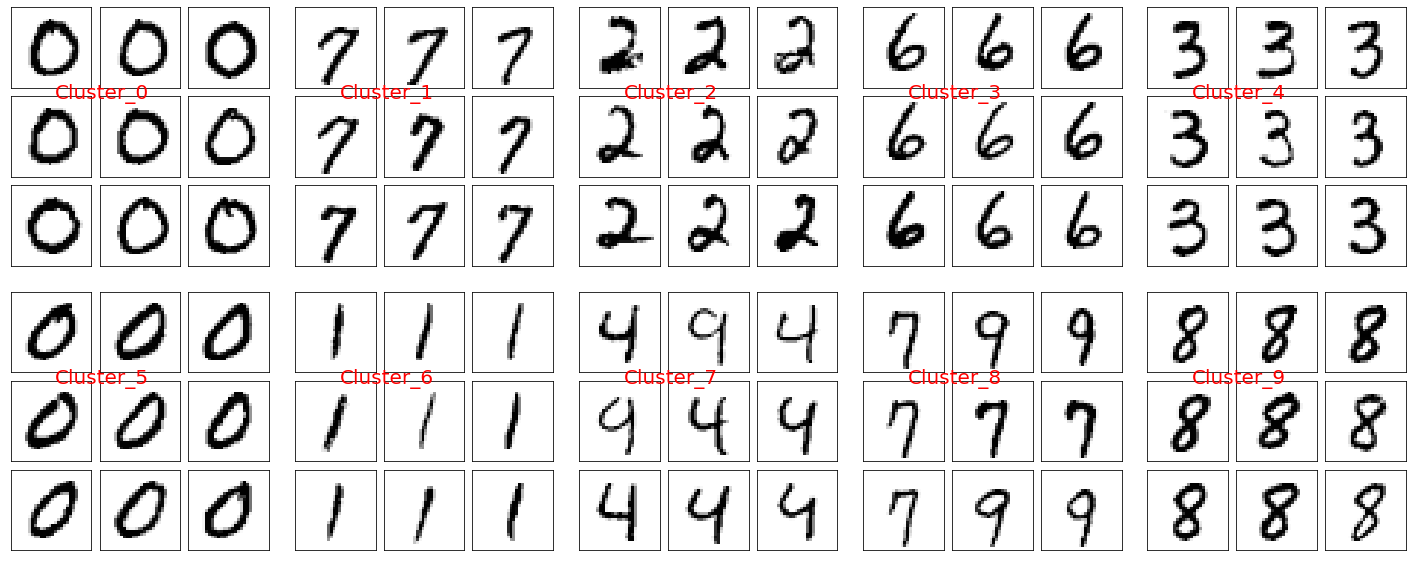

In [350]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 10))
# setup the dimension for the outer grid
nrow = 2
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = mylist[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        
        ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          t.set_size(20)
          t.set_color("red")
          ax.set_facecolor("yellow")
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

Now, Plot random 8 images in each cluster

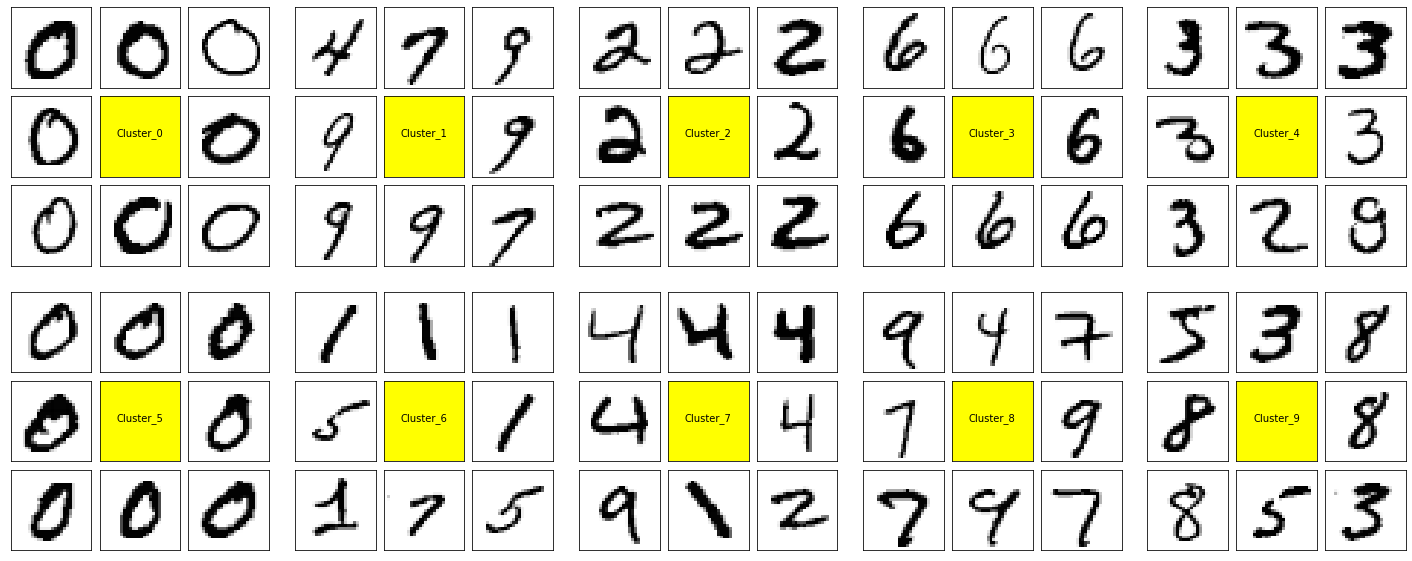

In [346]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 10))
# setup the dimension for the outer grid
nrow = 2
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = dict_of_clusters[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          ax.set_facecolor("yellow")
        else:
          ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

In [ ]:
def get_all_sub_plots(dict_of_clusters):
  result = []
  for i in range(len(dict_of_clusters)):
    cluster_name = i
    current_list = dict_of_clusters[i]
    result.append(pImg_subImg_for_3b(current_list, cluster_name))
  
  return result
a = get_all_sub_plots(dict_of_clusters)

# K=5, P=10

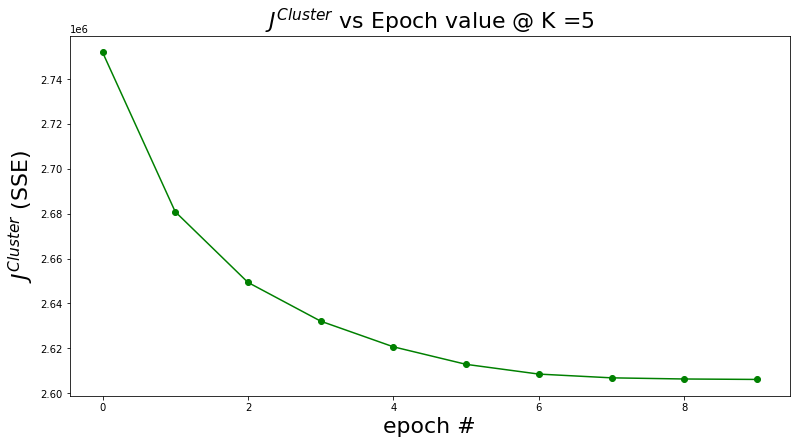

In [352]:
lbs, dict_of_clusters, JvE, myKmeanModel = k_mean_minst_clustering(X,K=5,P=10)

In [353]:
# report the last J_Cluster Value
print(JvE[-1])

2606122.670077964


In [354]:
# Now, need to calculate the top 10 nearest images to each center
near_ten_elements = []
mycenterpoints = myKmeanModel.cluster_centers_

def cal_dist(a,b):
  dist = 0
  for i in range(len(a)):
    dist += (a[i]-b[i])*(a[i]-b[i])
  return dist

mylist = []
for i in range(len(dict_of_clusters)):
  image_need_to_be_sort = copy.deepcopy(dict_of_clusters[i])
  dummy_result = []
  dummy_sort = []
  for j in image_need_to_be_sort:
    dummy_sort.append([cal_dist(j, mycenterpoints[i]), j])
  dummy_sort.sort()
  for k in range(10):
    d, ig = dummy_sort[k]
    dummy_result.append(ig)
  
  mylist.append(copy.deepcopy(dummy_result))

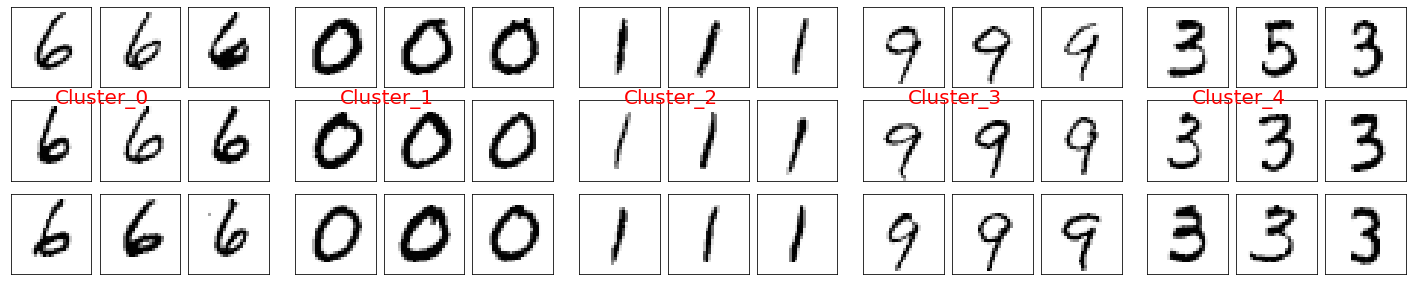

In [356]:
# Now, need to calculate the top 9 nearest images to each center
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 5))
# setup the dimension for the outer grid
nrow = 1
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = mylist[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        
        ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          t.set_size(20)
          t.set_color("red")
          ax.set_facecolor("yellow")
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

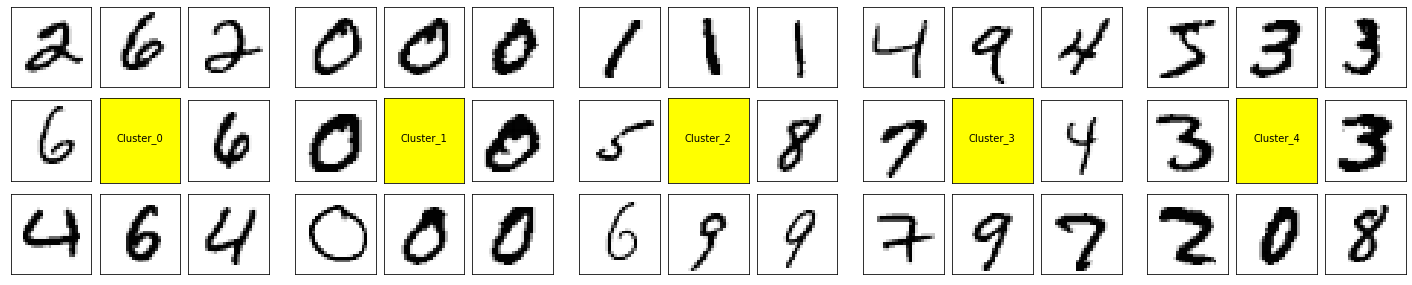

In [357]:
# Now, Plot random 8 images in each cluster
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 5))
# setup the dimension for the outer grid
nrow = 1
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = dict_of_clusters[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          ax.set_facecolor("yellow")
        else:
          ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

# K=20, P=30

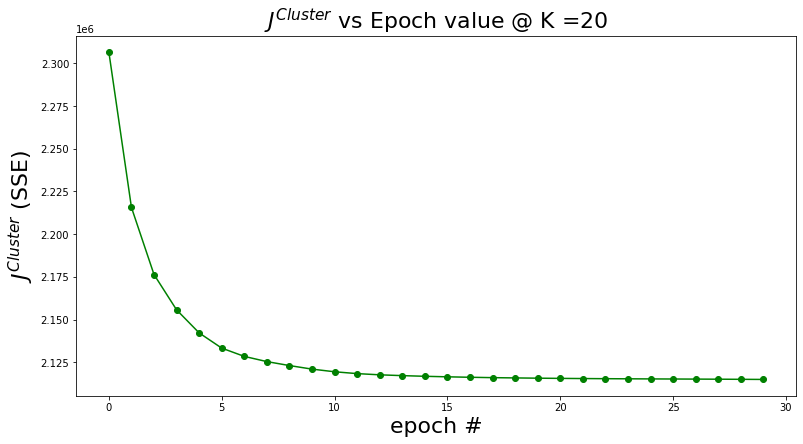

In [358]:
lbs, dict_of_clusters, JvE, myKmeanModel = k_mean_minst_clustering(X,K=20,P=30)

In [359]:
# report the last J_Cluster Value
print(JvE[-1])

2114948.3991600866


In [360]:
# Now, need to calculate the top 10 nearest images to each center
near_ten_elements = []
mycenterpoints = myKmeanModel.cluster_centers_

def cal_dist(a,b):
  dist = 0
  for i in range(len(a)):
    dist += (a[i]-b[i])*(a[i]-b[i])
  return dist

mylist = []
for i in range(len(dict_of_clusters)):
  image_need_to_be_sort = copy.deepcopy(dict_of_clusters[i])
  dummy_result = []
  dummy_sort = []
  for j in image_need_to_be_sort:
    dummy_sort.append([cal_dist(j, mycenterpoints[i]), j])
  dummy_sort.sort()
  for k in range(10):
    d, ig = dummy_sort[k]
    dummy_result.append(ig)
  
  mylist.append(copy.deepcopy(dummy_result))

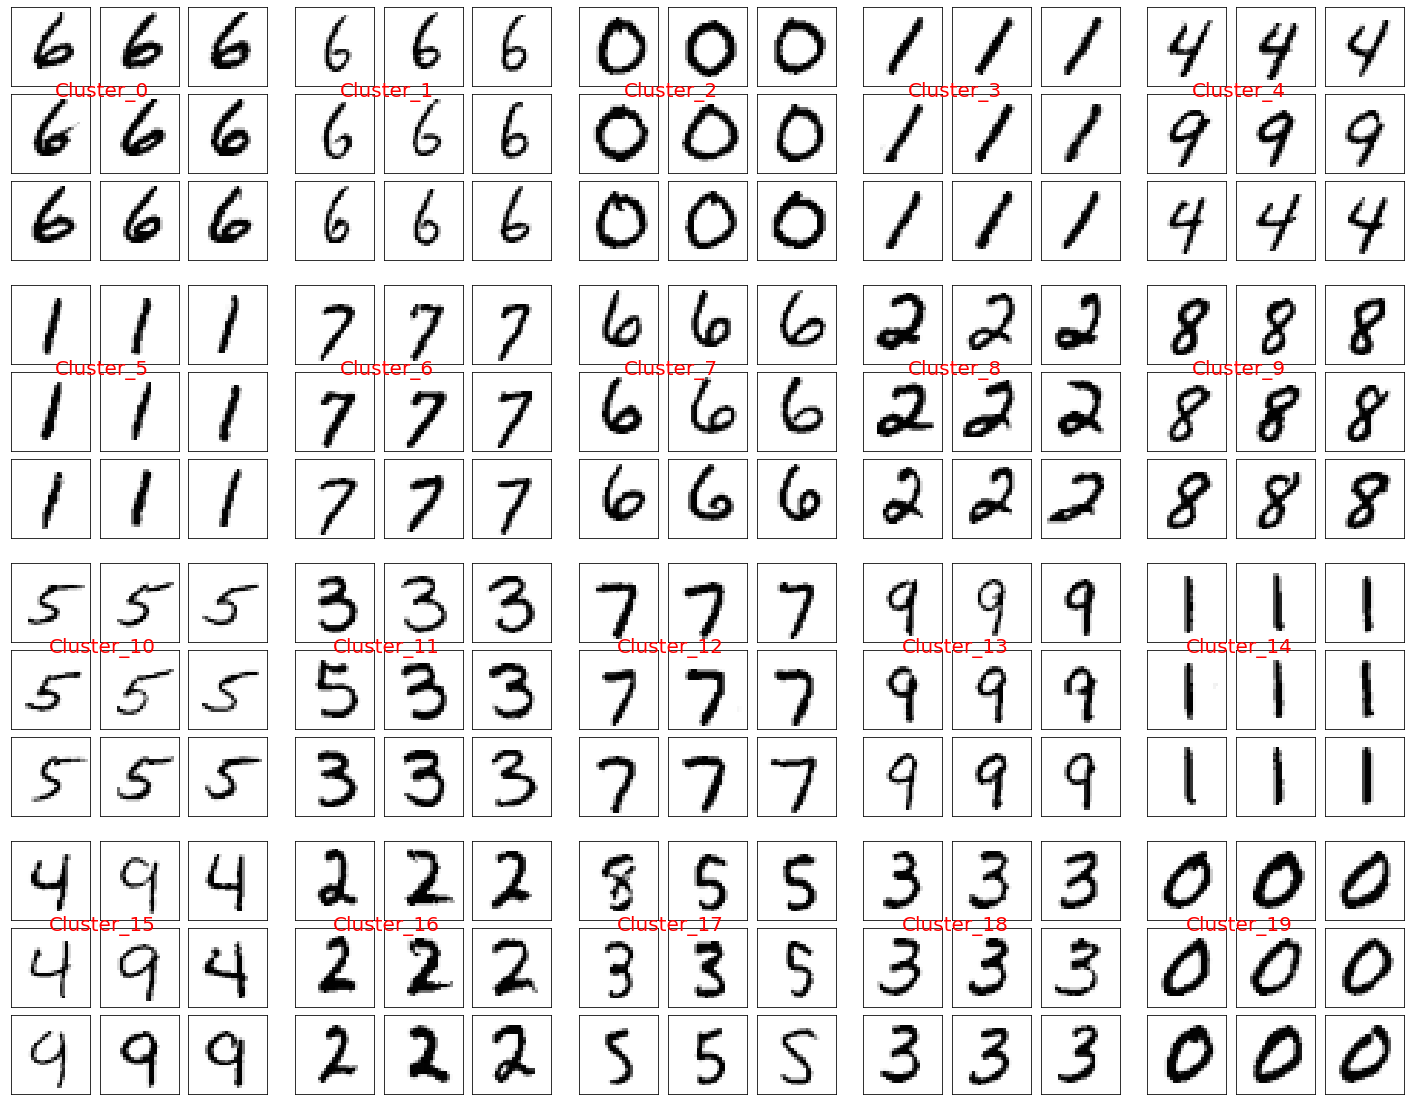

In [361]:
# Now, need to calculate the top 9 nearest images to each center
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 20))
# setup the dimension for the outer grid
nrow = 4
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = mylist[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        
        ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          t.set_size(20)
          t.set_color("red")
          ax.set_facecolor("yellow")
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

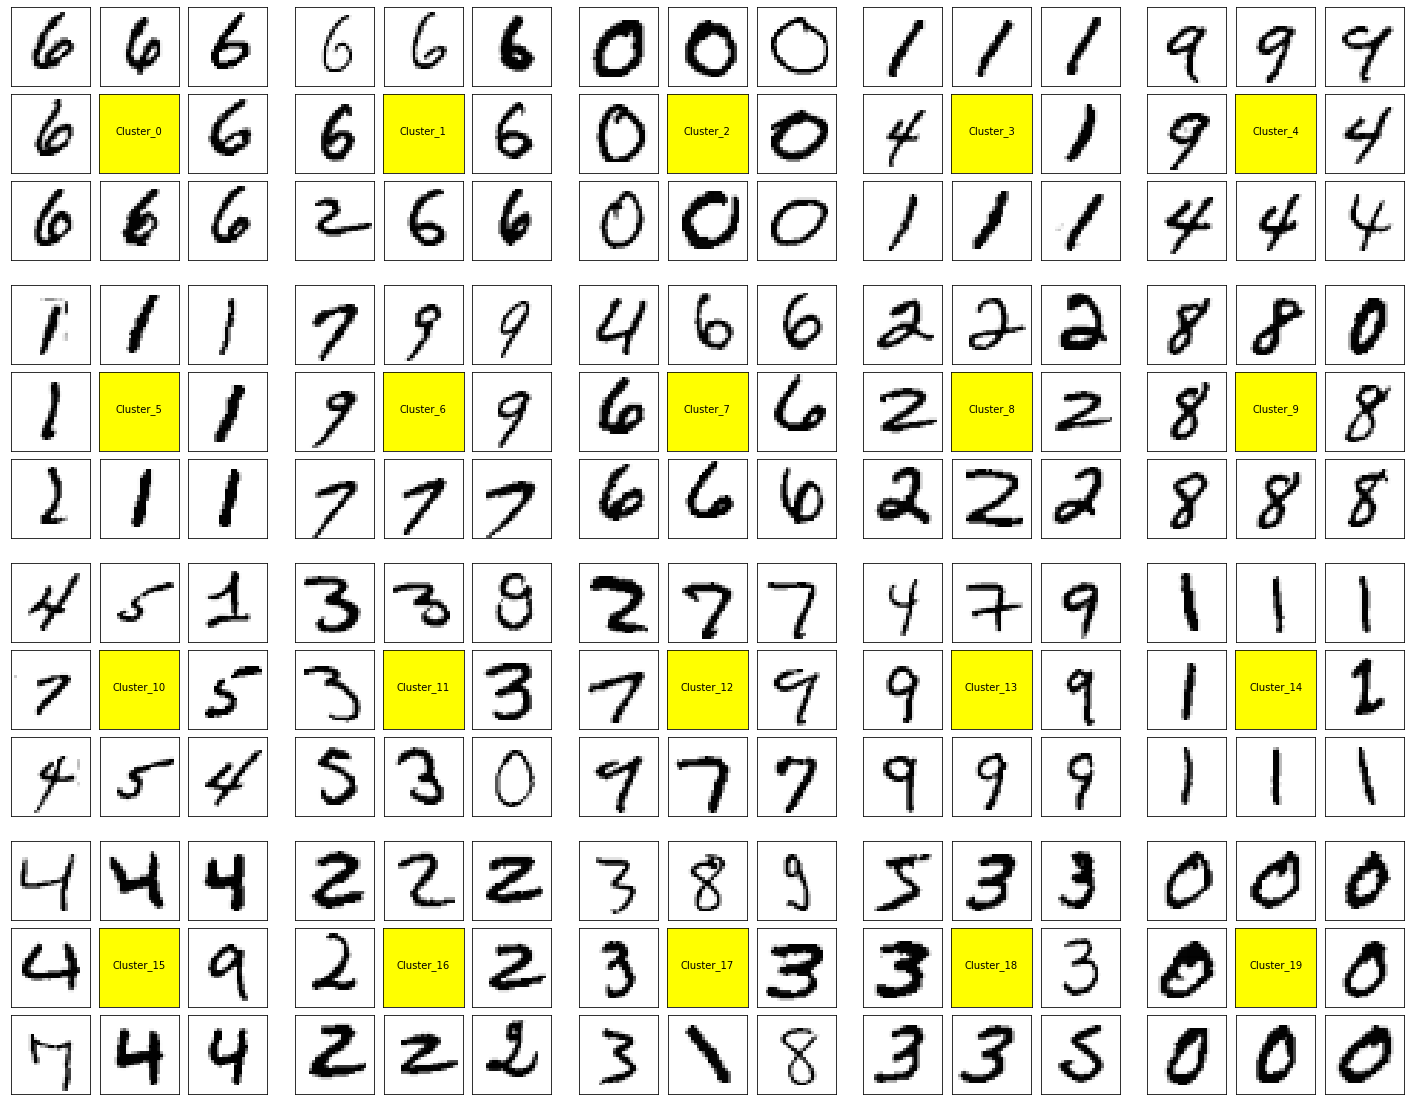

In [362]:
# Now, Plot random 8 images in each cluster
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 20))
# setup the dimension for the outer grid
nrow = 4
ncol = 5
outer = gridspec.GridSpec(nrow, ncol, wspace=0.1, hspace=0.1)

for i in range(nrow*ncol):
    inner_col = 3
    inner_row = 3
    inner = gridspec.GridSpecFromSubplotSpec(inner_col, inner_row,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    # get the image list from result
    cluster_name = i

    ## modify here to get different raw datas
    pics = dict_of_clusters[i]
    for j in range(inner_col*inner_row):
        ax = plt.Subplot(fig, inner[j])
        fig.subplots_adjust(wspace=0, hspace=0)
        train_data_sample_reshaped = np.reshape(pics[j], (28, 28))
        if j ==4:
          t = ax.text(0.5,0.5, "Cluster_{}".format(cluster_name))
          t.set_ha('center')
          ax.set_facecolor("yellow")
        else:
          ax.imshow(train_data_sample_reshaped, cmap='Greys', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()